<a href="https://colab.research.google.com/github/PavankumarPandya14/CODSOFT/blob/main/CREDIT-CARD-FRAUD-DETECTION/Credit_Card_Fraud_Detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Credit-Card Fraud Detection**

The Credit Card Fraud Detection dataset on Kaggle is a popular dataset used to identify fraudulent credit card transactions. The primary challenge is to develop a model that can accurately classify transactions as fraudulent or legitimate. This problem is crucial in the real world, as credit card fraud can lead to significant financial losses for both individuals and financial institutions.

### Problem Statement

The goal is to build a classification model that can detect fraudulent credit card transactions based on the available features. The model should minimize false positives (legitimate transactions classified as fraudulent) and false negatives (fraudulent transactions classified as legitimate).

### Dataset Description

The dataset consists of credit card transactions over a two-day period in September 2013. It contains a total of 284,807 transactions, with only 492 fraudulent transactions, making it highly imbalanced. The dataset includes the following columns:

- **Time**: The number of seconds elapsed between this transaction and the first transaction in the dataset.
- **V1, V2, ..., V28**: The result of a PCA transformation on the original feature set to protect confidentiality. These are the principal components.
- **Amount**: The transaction amount.
- **Class**: The target variable, where 1 indicates a fraudulent transaction and 0 indicates a legitimate transaction.

### Challenges

1. **Class Imbalance**: The dataset is highly imbalanced, with only 0.172% of the transactions being fraudulent.
2. **Feature Confidentiality**: The features are anonymized using PCA, which can make interpretation and feature engineering more challenging.
3. **Performance Metrics**: Accuracy is not a suitable metric due to the class imbalance. Metrics such as precision, recall, F1-score, and the area under the precision-recall curve (AUC-PR) are more appropriate.


# Steps to solve the problem

## Importing Dataset

In [ ]:
# Step 1: Install Kaggle
!pip install kaggle

# Step 2: Move kaggle.json to the correct directory
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

# Step 3: Download the dataset
!kaggle datasets download -d mlg-ulb/creditcardfraud

# Step 4: Unzip the dataset
!unzip creditcardfraud.zip

cp: cannot stat 'kaggle.json': No such file or directory
chmod: cannot access '/root/.kaggle/kaggle.json': No such file or directory
Dataset URL: https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud
License(s): DbCL-1.0
 97% 64.0M/66.0M [00:02<00:00, 33.0MB/s]
100% 66.0M/66.0M [00:02<00:00, 23.9MB/s]
Archive:  creditcardfraud.zip
  inflating: creditcard.csv          


## Data Exploration

In [ ]:
import pandas as pd

# Load the dataset
file_path = '/content/creditcard.csv'
data = pd.read_csv(file_path)

# Display basic information about the dataset
dataset_info = {
    "First Five Rows": data.head(),
    "Dataset Shape": data.shape,
    "Data Types": data.dtypes,
    "Missing Values": data.isnull().sum(),
    "Summary Statistics": data.describe()
}

dataset_info

{'First Five Rows':    Time        V1        V2        V3        V4        V5        V6        V7  \
 0   0.0 -1.359807 -0.072781  2.536347  1.378155 -0.338321  0.462388  0.239599   
 1   0.0  1.191857  0.266151  0.166480  0.448154  0.060018 -0.082361 -0.078803   
 2   1.0 -1.358354 -1.340163  1.773209  0.379780 -0.503198  1.800499  0.791461   
 3   1.0 -0.966272 -0.185226  1.792993 -0.863291 -0.010309  1.247203  0.237609   
 4   2.0 -1.158233  0.877737  1.548718  0.403034 -0.407193  0.095921  0.592941   
 
          V8        V9  ...       V21       V22       V23       V24       V25  \
 0  0.098698  0.363787  ... -0.018307  0.277838 -0.110474  0.066928  0.128539   
 1  0.085102 -0.255425  ... -0.225775 -0.638672  0.101288 -0.339846  0.167170   
 2  0.247676 -1.514654  ...  0.247998  0.771679  0.909412 -0.689281 -0.327642   
 3  0.377436 -1.387024  ... -0.108300  0.005274 -0.190321 -1.175575  0.647376   
 4 -0.270533  0.817739  ... -0.009431  0.798278 -0.137458  0.141267 -0.206010   
 

First Five Rows:

The dataset consists of features labeled V1 to V28, Time, Amount, and Class.
The 'Class' variable, which is our target, is binary (0 or 1).
Dataset Shape:

The dataset has 284,807 rows and 31 columns.
Data Types:

All features are numeric. Most are of type float64, and 'Class' is an int64.
Missing Values:

There are no missing values in the dataset.

## Data Visualization

### Histograms

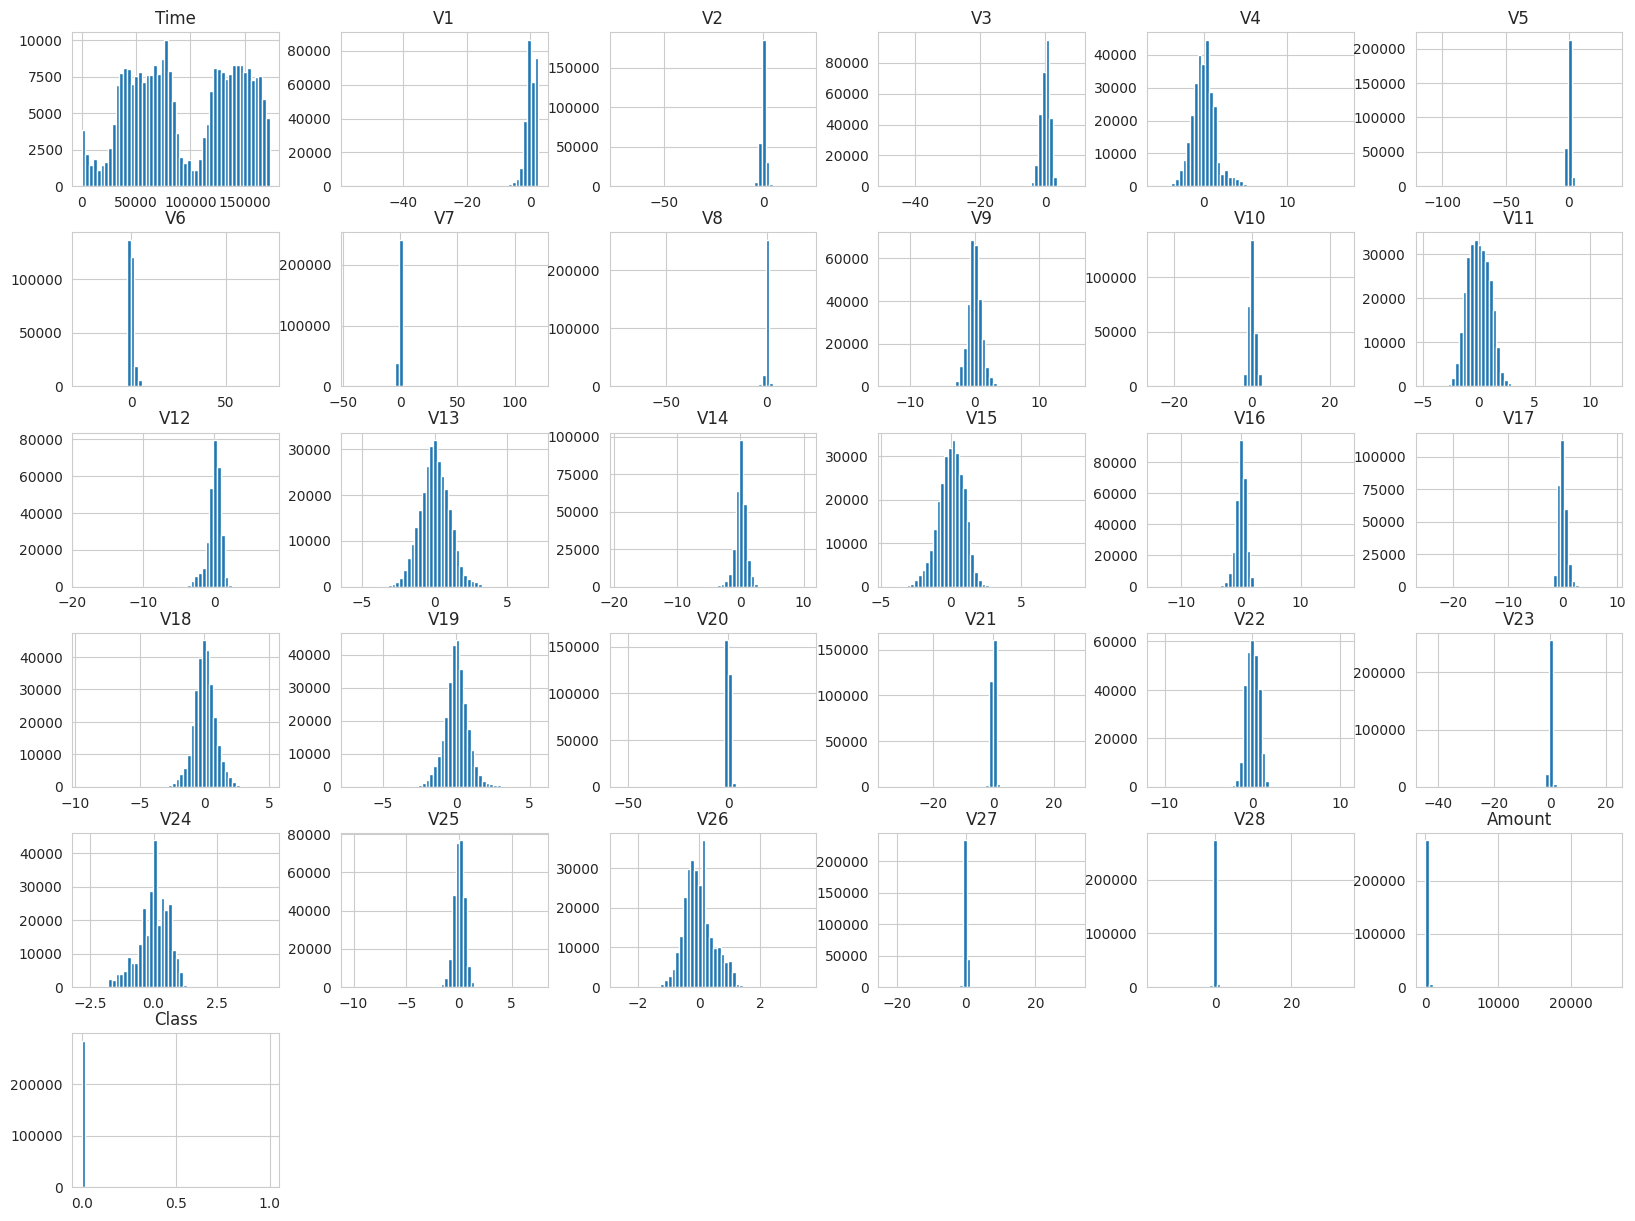

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the aesthetic style of the plots
sns.set_style("whitegrid")

# Plotting histograms for each column
data.hist(bins=50, figsize=(20,15))
plt.show()

### Correlation Heatmap

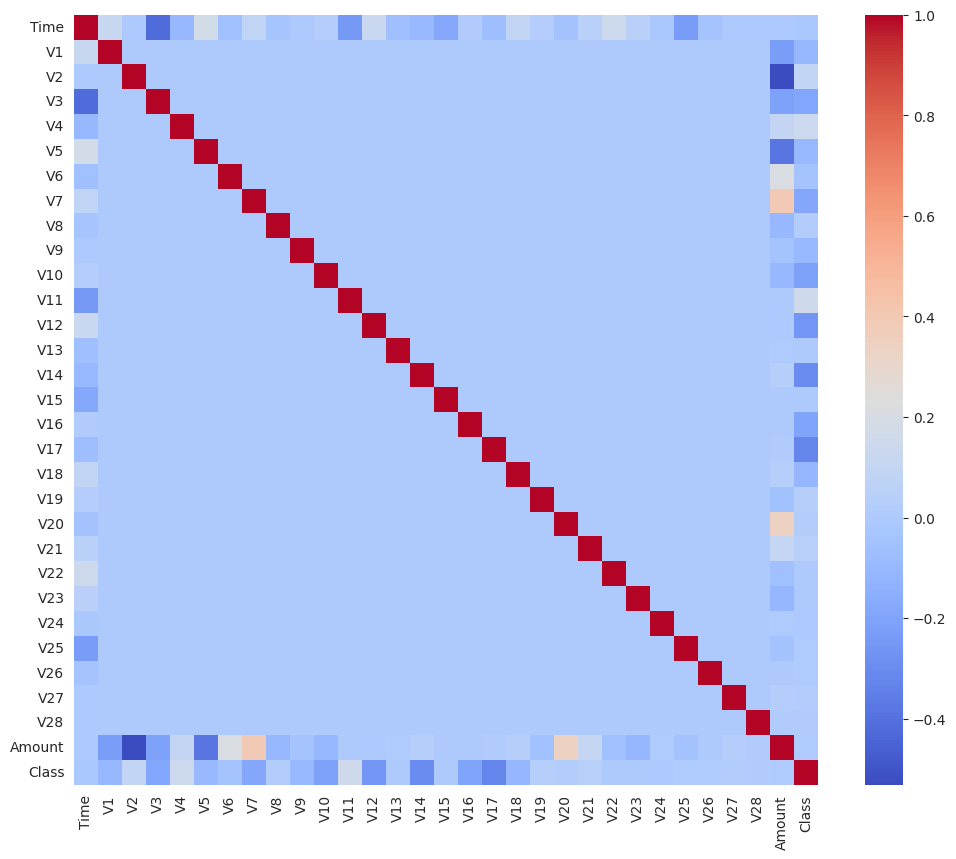

In [ ]:
plt.figure(figsize=(12, 10))
sns.heatmap(data.corr(), annot=False, cmap='coolwarm')
plt.show()

### Boxplot (for Outliers)

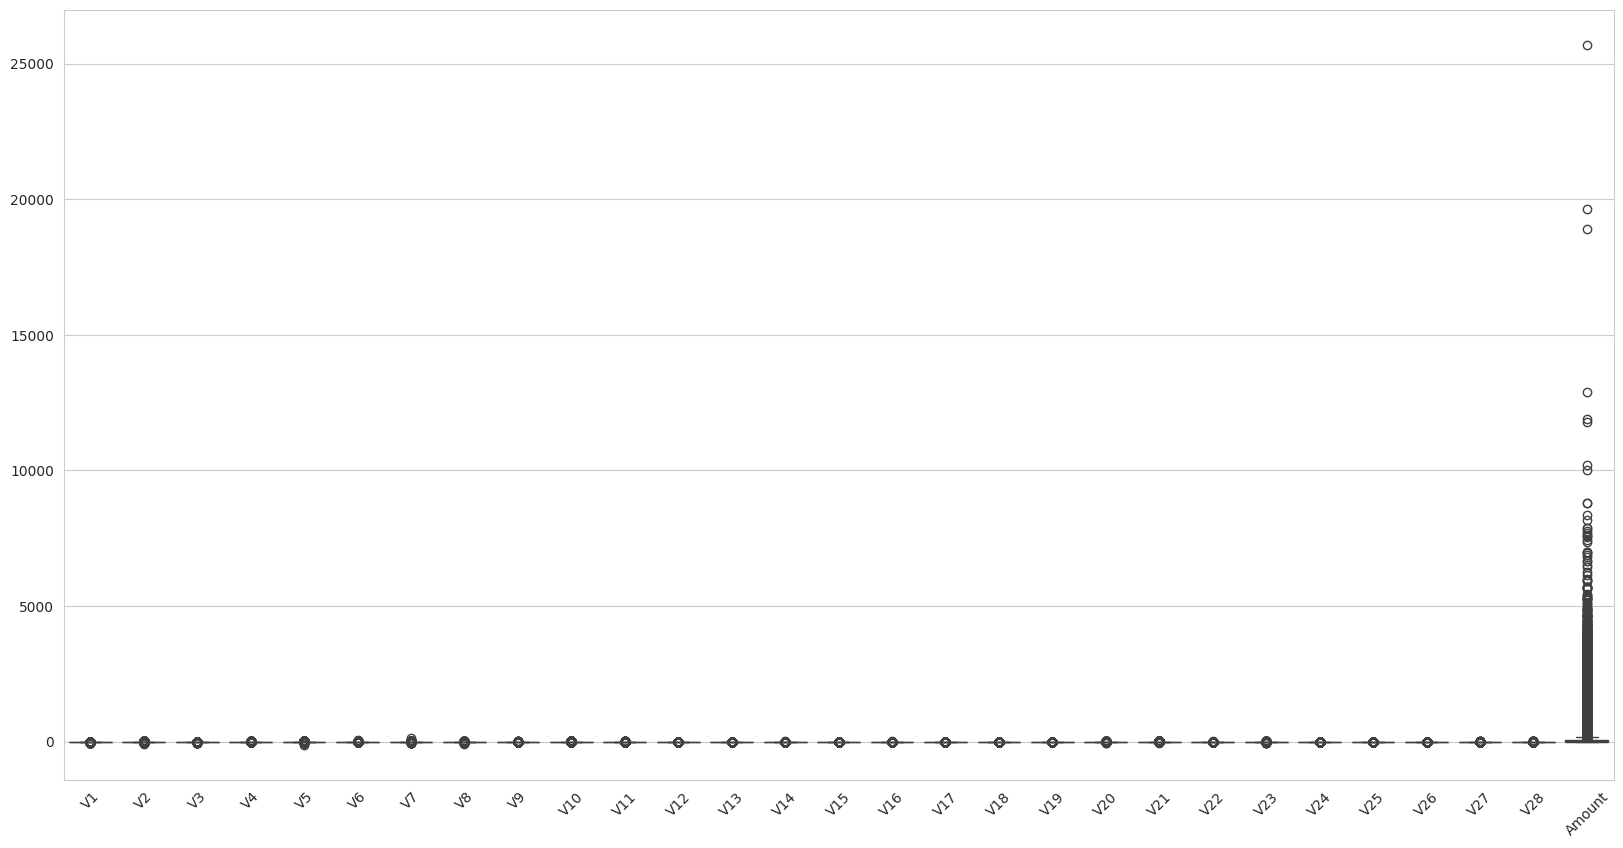

In [ ]:
# You can plot box plots for each feature to detect outliers.
# Due to a large number of features, you may choose to plot them in batches or individually.

plt.figure(figsize=(20, 10))
sns.boxplot(data=data.drop(columns=['Class', 'Time']))
plt.xticks(rotation=45)
plt.show()

### Bar Chart (for Class distributions)

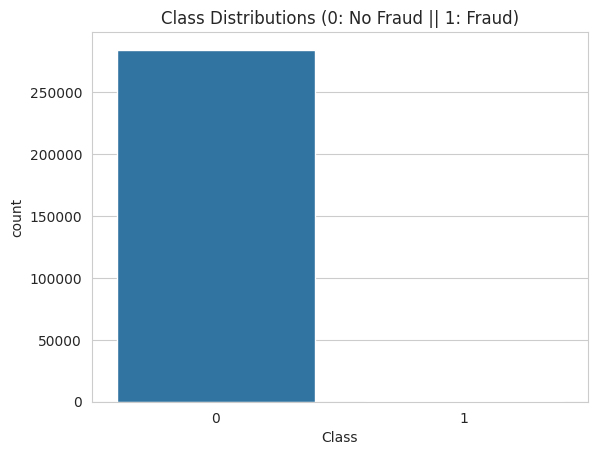

In [ ]:
sns.countplot(x='Class', data=data)
plt.title('Class Distributions (0: No Fraud || 1: Fraud)')
plt.show()

**NOTE:** The classes are highly imballanced with very few 'Fraud Cases'

## Data Preprocessing

In [ ]:
from sklearn.preprocessing import RobustScaler
import numpy as np

# Create a new DataFrame for the robustly scaled features
robust_scaled_features = data.copy()

# Apply RobustScaler to Time and Amount
robust_scaler = RobustScaler()
robust_scaled_features['Robust_Scaled_Time'] = robust_scaler.fit_transform(data['Time'].values.reshape(-1, 1))
robust_scaled_features['Robust_Scaled_Amount'] = robust_scaler.fit_transform(data['Amount'].values.reshape(-1, 1))

# Assuming Time feature represents seconds, converting it to hours
hours_in_day = 24

# Create cyclical features for hours from Robust_Scaled_Time
robust_scaled_features['sin_time'] = np.sin(2 * np.pi * robust_scaled_features.Robust_Scaled_Time/hours_in_day)
robust_scaled_features['cos_time'] = np.cos(2 * np.pi * robust_scaled_features.Robust_Scaled_Time/hours_in_day)

# Drop the original Time and Amount features
robust_scaled_features.drop(['Time', 'Amount', 'Robust_Scaled_Time'], axis=1, inplace=True)

## Expanding the dataset

### SMOTE

The dataset often suffers from class imbalance, where the number of fraudulent transactions is significantly lower than the number of legitimate transactions. This class imbalance can lead to models that are biased towards the majority class (legitimate transactions) and perform poorly in detecting the minority class (fraudulent transactions).

SMOTE (Synthetic Minority Over-sampling Technique) is used to address this class imbalance by generating synthetic samples for the minority class. It works by creating synthetic samples that are similar to existing minority class samples, thus balancing the class distribution. This helps in training more robust models that can better generalize to unseen data and improve the detection of fraudulent transactions.

In [ ]:
from imblearn.over_sampling import SMOTE

# Separate input features and target
X = robust_scaled_features.drop('Class', axis=1)
y = robust_scaled_features['Class']

# Applying SMOTE
smote = SMOTE(random_state=42)
X_resampled, y_resampled = smote.fit_resample(X, y)

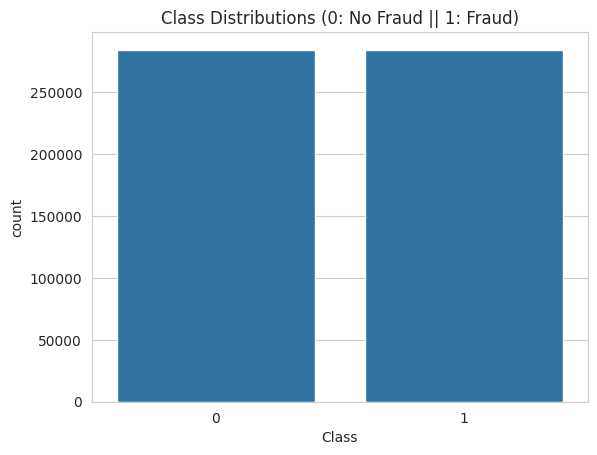

In [ ]:
sns.countplot(x='Class', data=pd.DataFrame(y_resampled))
plt.title('Class Distributions (0: No Fraud || 1: Fraud)')
plt.show()

## Splitiing the data

In [ ]:
from sklearn.model_selection import train_test_split

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.2, random_state=42)
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((454904, 31), (113726, 31), (454904,), (113726,))

## Modelling

In [ ]:
# Importing libaries
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import cross_val_score

# Initialize classifiers for each algorithm
logistic_reg = LogisticRegression(max_iter=1000)
random_forest = RandomForestClassifier()
xgb_clf = XGBClassifier(random_state=42, use_label_encoder=False, eval_metric='auc')

# Define a list of classifiers for iteration
classifiers = [
    ("Logistic Regression", logistic_reg),
    ("Random Forest", random_forest),
    ("XGB Classifier", xgb_clf)
]

confusion_matrices = {}
# Iterate through classifiers, fit, predict, and evaluate
for name, classifier in classifiers:
    cv_scores = cross_val_score(classifier, X_resampled, y_resampled, cv=3, scoring='roc_auc')
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    confusion_matrices[name] = confusion_matrix(y_test, y_pred)

    print(f"Algorithm: {name}")
    print(f"Accuracy: {accuracy:.2f}")
    print(f"{name}'s Cross-Validated ROC AUC Scores: {cv_scores}")
    print("Classification Report:\n", classification_report(y_test, y_pred))
    print("--------------------------------------------------")

Algorithm: Logistic Regression
Accuracy: 0.95
Logistic Regression's Cross-Validated ROC AUC Scores: [0.95216305 0.98527978 0.97151284]
Classification Report:
               precision    recall  f1-score   support

           0       0.93      0.98      0.95     56750
           1       0.97      0.92      0.95     56976

    accuracy                           0.95    113726
   macro avg       0.95      0.95      0.95    113726
weighted avg       0.95      0.95      0.95    113726

--------------------------------------------------
Algorithm: Random Forest
Accuracy: 1.00
Random Forest's Cross-Validated ROC AUC Scores: [0.99909001 0.99949105 0.99982816]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00 

## Saving the models

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
from joblib import load, dump

filepath = '/content/drive/MyDrive/'
# Save the model to a file
dump(random_forest, filepath+'random_forest_model.joblib')
dump(logistic_reg, filepath+'logistic_regression_model.joblib')
dump(xgb_clf, 'xgb_classifier_model.joblib')
print("Models saved successfully!")

Models saved successfully!


## Loading the models

In [ ]:
logistic_regression_model = load('/content/drive/MyDrive/logistic_regression_model.joblib')
random_forest_model = load('/content/drive/MyDrive/random_forest_model.joblib')
xgb_classifier_model = load('/content/drive/MyDrive/xgb_classifier_model.joblib')
print('Models loaded successfully!')

Models loaded successfully!


## Evaluation

### Confusion matrix

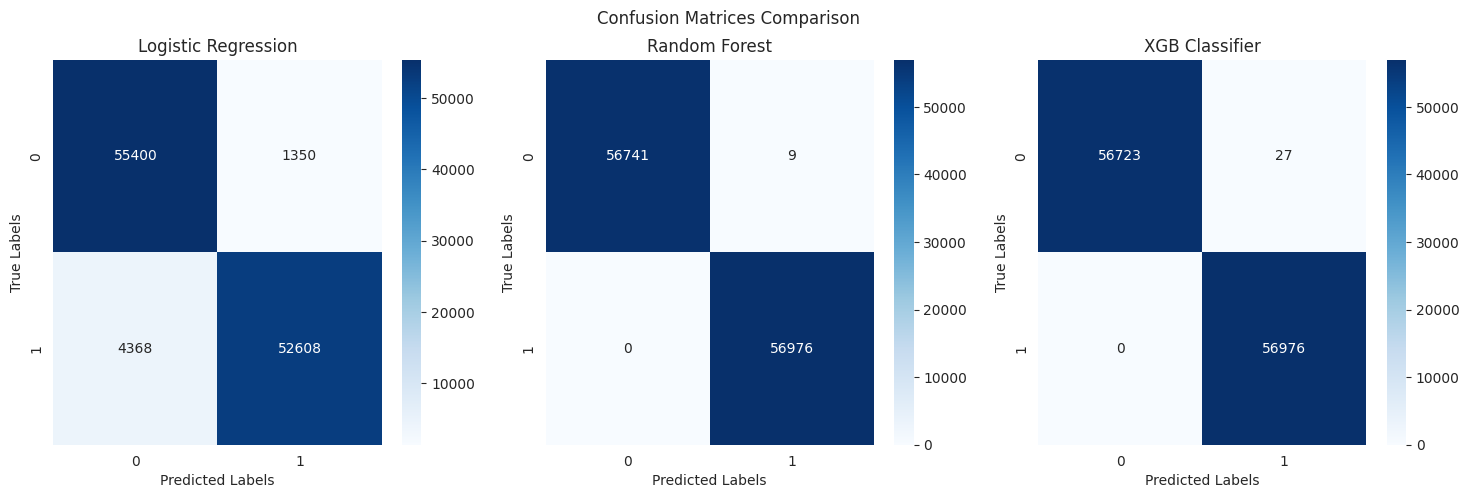

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

fig, axes = plt.subplots(1, 3, figsize=(18, 5))
fig.suptitle('Confusion Matrices Comparison')
i=0

for model, conf_matrix in confusion_matrices.items():
    sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues", ax=axes[i])
    axes[i].set_title(model)
    axes[i].set_xlabel('Predicted Labels')
    axes[i].set_ylabel('True Labels')
    i+=1

plt.show()

### AUC/ROC Curve

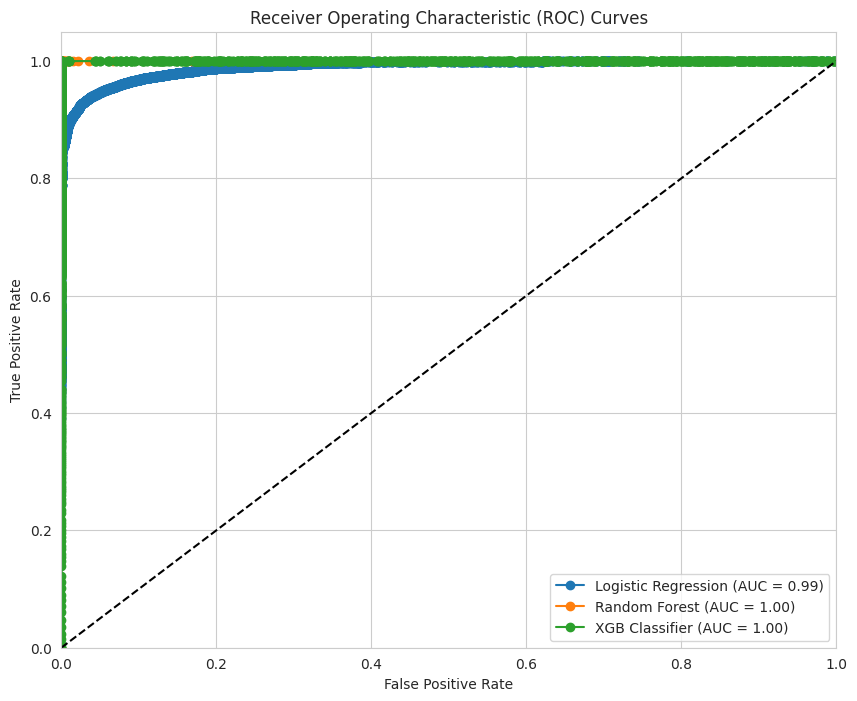

In [ ]:
from sklearn.metrics import roc_curve, roc_auc_score

classifiers = {
    "Logistic Regression": logistic_reg,
    "Random Forest": random_forest,
    "XGB Classifier": xgb_clf
}

plt.figure(figsize=(10, 8))

for name, model in classifiers.items():
  prob = model.predict_proba(X_test)[:,1]
  fpr, tpr, thresholds = roc_curve(y_test, prob)
  plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc_score(y_test, prob):0.2f})', marker='o')

plt.plot([0, 1], [0, 1], 'k--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curves')
plt.legend(loc="lower right")
plt.show()

**NOTE:** From the above scores, it is evident that both the Random Forest and XGBClassifier perform well in classifying frauds. However, the confusion matrix shows that the Random Forest model performs slightly better than the XGBClassifier.

## Hyperparameter Tuning

**NOTE:** Although the Random Forest algorithm is better at classifying frauds, it takes a significant amount of time to run. In contrast, XGBClassifiers are much faster in terms of training time. Therefore, we will be fine-tuning the 'XGBClassifier'.

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define the parameter grid
param_grid = {
    'n_estimators': [100, 300],
    'learning_rate': [0.01, 0.1],
    'max_depth': [3, 5],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

# Initialize GridSearchCV
grid_search_xgb = GridSearchCV(estimator=xgb_clf, param_grid=param_grid, scoring='roc_auc', cv=5, n_jobs=-1, verbose=2)

# Fit GridSearchCV
grid_search_xgb.fit(X_resampled, y_resampled)

# Get the best parameters and best score
best_params = grid_search_xgb.best_params_
best_score = grid_search_xgb.best_score_

# Print the best parameters and the best score
print(f"Best parameters: {best_params}")
print(f"Best cross-validated ROC AUC score: {best_score}")

Fitting 5 folds for each of 72 candidates, totalling 360 fits
Best parameters: {'colsample_bytree': 0.8, 'learning_rate': 0.1, 'max_depth': 5, 'n_estimators': 300, 'subsample': 0.6}
Best cross-validated ROC AUC score: 0.9992037629159108


In [ ]:
dump(grid_search_xgb, filepath+'grid_search_xgb.joblib')
grid_search_xgb = load('/content/drive/MyDrive/grid_search_xgb.joblib')

['/content/drive/MyDrive/grid_search_xgb.joblib']

In [ ]:
from sklearn.metrics import classification_report, roc_auc_score, confusion_matrix
# Evaluation with the tuned model
y_pred = grid_search_xgb.predict(X_test)
prob = grid_search_xgb.predict_proba(X_test)[:,1]

# Print the evaluation results with the tuned model
print('Results for Tuned XGB Classifier model')
print('------------------------------------------')
print("\nClassification Report:\n", classification_report(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, prob))
print("Confusion matrix:\n", confusion_matrix(y_test, y_pred))

Results for Tuned XGB Classifier model
------------------------------------------

Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     56750
           1       1.00      1.00      1.00     56976

    accuracy                           1.00    113726
   macro avg       1.00      1.00      1.00    113726
weighted avg       1.00      1.00      1.00    113726

ROC AUC Score: 0.9999999338155521
Confusion matrix:
 [[56728    22]
 [    0 56976]]


## Observation
There is a minor increase in the performance of the XGBClassifier; however, the Random Forest algorithm outperforms all other algorithms, making it the ideal choice for this credit card fraud detection problem.

# Conclusion

The Credit Card Fraud Detection dataset provides a valuable opportunity to apply machine learning techniques to a critical real-world problem. By addressing the challenges of class imbalance and feature anonymization, models can be developed that can effectively identify fraudulent transactions and contribute to financial security and operational efficiency.

### Real-World Applications

Detecting credit card fraud has significant real-world implications:

1. **Financial Security**: Preventing financial losses for individuals and institutions.
2. **Risk Management**: Enhancing risk management systems for financial institutions.
3. **Customer Trust**: Building customer trust by ensuring secure transactions.
4. **Operational Efficiency**: Automating fraud detection to reduce the workload on human analysts.


### **Author**
Pavankumar Pandya